# Synthetic data examples

In this Notebook we will build synthetic data suitable to Alphalens analysis. This is useful to understand how Alphalens expects the input to be formatted and also it is a good testing environment to experiment with Alphalens.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from numpy import nan
from pandas import (DataFrame, date_range)

from alphalens.tears import (create_returns_tear_sheet,
                             create_information_tear_sheet,
                             create_turnover_tear_sheet,
                             create_summary_tear_sheet,
                             create_full_tear_sheet,
                             create_event_returns_tear_sheet,
                             create_event_study_tear_sheet)

from alphalens.utils import get_clean_factor_and_forward_returns

In [2]:
import alphalens as al

In [3]:
#
# build price
#
price_index = date_range(start='2015-1-10', end='2015-2-28')
price_index.name = 'date'
tickers = ['A', 'B', 'C', 'D', 'E', 'F']
data = [[1.0025**i, 1.005**i, 1.00**i, 0.995**i, 1.005**i, 1.00**i]
        for i in range(1, 51)]
base_prices = DataFrame(index=price_index, columns=tickers, data=data)

#
# build factor
#
factor_index = date_range(start='2015-1-15', end='2015-2-13')
factor_index.name = 'date'
factor = DataFrame(index=factor_index, columns=tickers,
                   data=[[3, 4, 2, 1, nan, nan], [3, nan, nan, 1, 4, 2],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, 4, 2, 1, nan, nan], [3, 4, 2, 1, nan, nan],
                         [3, nan, nan, 1, 4, 2], [3, nan, nan, 1, 4, 2]])
factor_groups = {'A': 'Group1', 'B': 'Group2', 'C': 'Group1', 'D': 'Group2', 'E': 'Group1', 'F': 'Group2'}

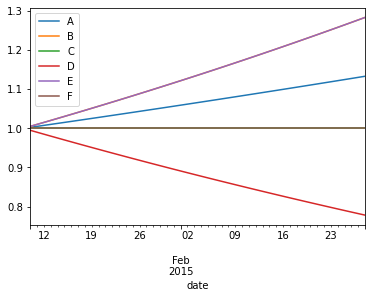

In [4]:
base_prices.plot()
plt.show()

In [5]:
base_prices.head()

,A,B,C,D,E,F
date,,,,,,
2015-01-10,1.002500,1.005000,1.0,0.995000,1.005000,1.0
2015-01-11,1.005006,1.010025,1.0,0.990025,1.010025,1.0
2015-01-12,1.007519,1.015075,1.0,0.985075,1.015075,1.0
2015-01-13,1.010038,1.020151,1.0,0.980150,1.020151,1.0
2015-01-14,1.012563,1.025251,1.0,0.975249,1.025251,1.0


In [6]:
# create artificial intraday prices

today_open = base_prices.copy()
today_open.index += pd.Timedelta('9h30m')

# every day, after 1 hour from open all stocks increase by 0.1%
today_open_1h = today_open.copy()
today_open_1h.index += pd.Timedelta('1h')
today_open_1h += today_open_1h*0.001

# every day, after 3 hours from open all stocks decrease by 0.2%
today_open_3h = today_open.copy()
today_open_3h.index += pd.Timedelta('3h')
today_open_3h -= today_open_3h*0.002

# prices DataFrame will contain all intraday prices
prices = pd.concat([today_open, today_open_1h, today_open_3h]).sort_index()

In [7]:
prices.head(10)

,A,B,C,D,E,F
date,,,,,,
2015-01-10 09:30:00,1.002500,1.005000,1.000,0.995000,1.005000,1.000
2015-01-10 10:30:00,1.003502,1.006005,1.001,0.995995,1.006005,1.001
2015-01-10 12:30:00,1.000495,1.002990,0.998,0.993010,1.002990,0.998
2015-01-11 09:30:00,1.005006,1.010025,1.000,0.990025,1.010025,1.000
2015-01-11 10:30:00,1.006011,1.011035,1.001,0.991015,1.011035,1.001
2015-01-11 12:30:00,1.002996,1.008005,0.998,0.988045,1.008005,0.998
2015-01-12 09:30:00,1.007519,1.015075,1.000,0.985075,1.015075,1.000
2015-01-12 10:30:00,1.008526,1.016090,1.001,0.986060,1.016090,1.001
2015-01-12 12:30:00,1.005504,1.013045,0.998,0.983105,1.013045,0.998


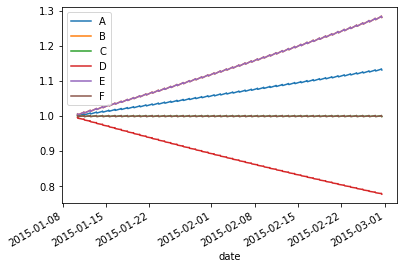

In [8]:
prices.plot()
plt.show()

In [9]:
# Align factor to open price
factor.index += pd.Timedelta('9h30m')
factor = factor.stack()
factor.index = factor.index.set_names(['date', 'asset'])

In [10]:
factor.head(10)

date                 asset
2015-01-15 09:30:00  A        3.0
                     B        4.0
                     C        2.0
                     D        1.0
2015-01-16 09:30:00  A        3.0
                     D        1.0
                     E        4.0
                     F        2.0
2015-01-17 09:30:00  A        3.0
                     B        4.0
dtype: float64

In [11]:
# Period 1: today open to open + 1 hour
# Period 2: today open to open + 3 hours
# Period 3: today open to next day open
# Period 6: today open to 2 days open

factor_data = get_clean_factor_and_forward_returns(
    factor,
    prices,
    groupby=factor_groups,
    quantiles=4,
    periods=(1, 2, 3, 6), 
    filter_zscore=None)

Dropped 0.0% entries from factor data: 0.0% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


In [12]:
factor_data.head(10)

1h     3h      1D        2D  factor   group  \
date                asset                                                   
2015-01-15 09:30:00 A      0.001 -0.002  0.0025  0.005006     3.0  Group1   
                    B      0.001 -0.002  0.0050  0.010025     4.0  Group2   
                    C      0.001 -0.002  0.0000  0.000000     2.0  Group1   
                    D      0.001 -0.002 -0.0050 -0.009975     1.0  Group2   
2015-01-16 09:30:00 A      0.001 -0.002  0.0025  0.005006     3.0  Group1   
                    D      0.001 -0.002 -0.0050 -0.009975     1.0  Group2   
                    E      0.001 -0.002  0.0050  0.010025     4.0  Group1   
                    F      0.001 -0.002  0.0000  0.000000     2.0  Group2   
2015-01-17 09:30:00 A      0.001 -0.002  0.0025  0.005006     3.0  Group1   
                    B      0.001 -0.002  0.0050  0.010025     4.0  Group2   

                           factor_quantile  
date                asset                   
2015-01-15 09:30:00 A                    3  
                    B                    4  
                    C                    2  
                    D                    1  
2015-01-16 09:30:00 A                    3  
                    D                    1  
                    E                    4  
                    F                    2  
2015-01-17 09:30:00 A                    3  
                    B                    4

# IC

In [13]:
ic = al.performance.factor_information_coefficient(factor_data)

In [14]:
import statsmodels.api as sm
from scipy import stats

In [15]:
import plotly.graph_objects as go

In [16]:
theoretical_dist=stats.norm
ic = ic['1h']

## scipy

In [17]:
from scipy.stats import probplot

In [18]:
import numpy as np

In [19]:
s = probplot(ic.replace(np.nan, 0.).values, dist=theoretical_dist, fit=True)

In [20]:
fig = go.Figure()
m_min, m_max = min(min(s[0][0]), min(s[0][1])), max(max(s[0][0]), max(s[0][1]))
fig.add_trace(
    go.Scatter(
        x=s[0][0],
        y=s[0][1],
        mode='markers',
    ))
fig.add_shape(
    dict(
        type="line",
        xref='paper',
        yref='paper',
        x0=0,
        y0=0,
        x1=1,
        y1=1,
        line=dict(
            color="red",
        )
    ))
range = [m_min-0.1, m_max+0.1]
fig.update_xaxes(title_text="IC", range=range)
fig.update_yaxes(range=range)
# fig.update_layout(
#     width=600, height=600
# )
fig.show()

## 使用 statsmodels

In [21]:
probplot = sm.ProbPlot(ic.replace(np.nan, 0.).values,theoretical_dist,fit=True)

In [22]:
x=probplot.theoretical_quantiles
y=probplot.sample_quantiles

In [23]:
fig = go.Figure()
m_min, m_max = min(min(x), min(y)), max(max(x), max(y))
fig.add_trace(
    go.Scatter(
        x=x,
        y=y,
        mode='markers',
    ))
fig.add_shape(
    dict(
        type="line",
        xref='paper',
        yref='paper',
        x0=0,
        y0=0,
        x1=1,
        y1=1,
        line=dict(
            color="red",
        )
    ))
range = [m_min-0.1, m_max+0.1]
fig.update_xaxes(title_text="IC", range=range)
fig.update_yaxes(range=range)
fig.show()

## 比较

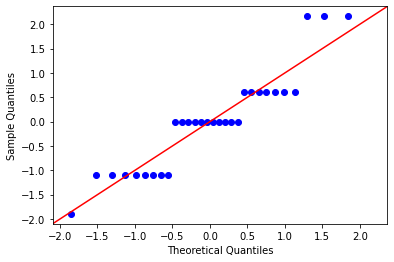

In [24]:
qq = sm.qqplot(ic.replace(np.nan, 0.).values, theoretical_dist, fit=True, line='45')

In [25]:
ic = al.performance.factor_information_coefficient(factor_data)

In [26]:
fig = al.plotting._ic_hist_fig(ic,'1h')

In [27]:
fig

In [28]:
fig.layout

Layout({
    'annotations': [{'showarrow': False,
                     'text': '均值 0.005 \n 标准差 0.441',
                     'x': 0.05,
                     'xref': 'paper',
                     'y': 0.95,
                     'yref': 'paper'}],
    'barmode': 'overlay',
    'hovermode': 'closest',
    'legend': {'traceorder': 'reversed'},
    'shapes': [{'line': {'color': 'black', 'dash': 'dash', 'width': 2},
                'type': 'line',
                'x0': 0.0051247543699529064,
                'x1': 0.0051247543699529064,
                'y0': 0,
                'y1': 1,
                'yref': 'paper'}],
    'showlegend': False,
    'template': '...',
    'title': {'text': '1h 周期信息系数'},
    'xaxis': {'anchor': 'y2', 'domain': [0.0, 1.0], 'range': [-1, 1], 'title': {'text': 'IC'}, 'zeroline': False},
    'yaxis': {'anchor': 'free', 'domain': [0.0, 1], 'position': 0.0}
})

## `create_information_tear_sheet`

In [29]:
create_information_tear_sheet(factor_data)

# `create_full_tear_sheet`

In [30]:
create_full_tear_sheet(factor_data, long_short=False, group_neutral=False, by_group=False)

# `create_event_returns_tear_sheet`

In [31]:
# create_event_returns_tear_sheet(factor_data, prices, avgretplot=(3, 11),
#                                 long_short=False, group_neutral=False, by_group=False)

In [32]:
# create_full_tear_sheet(factor_data, long_short=True, group_neutral=False, by_group=True)
# create_event_returns_tear_sheet(factor_data, prices, avgretplot=(3, 11),
#                                 long_short=True, group_neutral=False, by_group=True)

In [33]:
# create_full_tear_sheet(factor_data, long_short=True, group_neutral=True, by_group=True)
# create_event_returns_tear_sheet(factor_data, prices, avgretplot=(3, 11),
#                                 long_short=True, group_neutral=True, by_group=True)